## Imports
This cell loads necessary libraries and the dataset.

It imports pandas for data manipulation, joblib for loading pre-trained models,
seaborn and matplotlib.pyplot for data visualization, and numpy for numerical operations.
It then loads two datasets: `df_cluster_PCA_gp.csv`  and `AftDTsMPBROCKMETAL_KGDf.csv`.
    Finally, it loads a pre-trained scaler model from 'scaler.pkl' using joblib.

In [1]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Data for Modeling/df_cluster_PCA_gp.csv')
dfd = pd.read_csv('Data for Modeling/AftDTsMPBROCKMETAL_KGDf.csv')
scaler = joblib.load("scaler_encoder/scaler.pkl")





## Preparing data

**This cell prepares the data for analysis by normalizing it and separating it by genre.**

- Firsly, extracts the 'track_genre' column from the `dfd` DataFrame.This column, representing the genres of the tracks, is stored in the `genres` variable.
- Than, selects a subset of columns (from index 2 to 15) from `df` and stores them in `data`.
- This `data` is then transformed using the pre-loaded `scaler` to normalize its values.
- The normalized data is converted into a DataFrame called `normalized_df`, preserving the original column names.
- Next, `normalized_df` is merged with the `genres` Series based on their indices, creating `complete_normalized`.
- Finally, `complete_normalized` is filtered to create separate DataFrames for specific genres:
`mpb_rows` for "mpb" tracks, `rock_rows` for "rock" tracks, and `death_metal_rows` for "death-metal" tracks.
- The 'track_genre' column is then removed from these genre-specific DataFrames as it's no longer needed.

In [2]:
genres = dfd.iloc[:,23]
data = df.iloc[:,2:16]
data2 = scaler.transform(data)
normalized_df = pd.DataFrame(data2, columns=df.iloc[:,2:16].columns)
complete_normalized = pd.merge(normalized_df,genres, right_index=True, left_index=True)
mpb_rows = complete_normalized[complete_normalized.iloc[:,14] == "mpb"]
del mpb_rows["track_genre"]
rock_rows = complete_normalized[complete_normalized.iloc[:,14] == "rock"]
del rock_rows["track_genre"]
death_metal_rows = complete_normalized[complete_normalized.iloc[:,14] == "death-metal"]
del death_metal_rows["track_genre"]

## Plotting Full Covariance Matrix

**This cell defines a function to plot a full covariance matrix and then calls it for the entire normalized dataset.**
- The `plot_full_covariance_matrix` function takes a DataFrame `df2` as input.
- Inside the function, it calculates the covariance matrix of the input DataFrame using `np.cov()`.
- The covariance matrix is then converted into a Pandas DataFrame with appropriate row and column names.
- Finally, it generates a heatmap of this covariance matrix using seaborn, providing a visual representation of the relationships between different numerical features.
- After defining the function, it is called with `normalized_df` to display the covariance matrix for all normalized data.

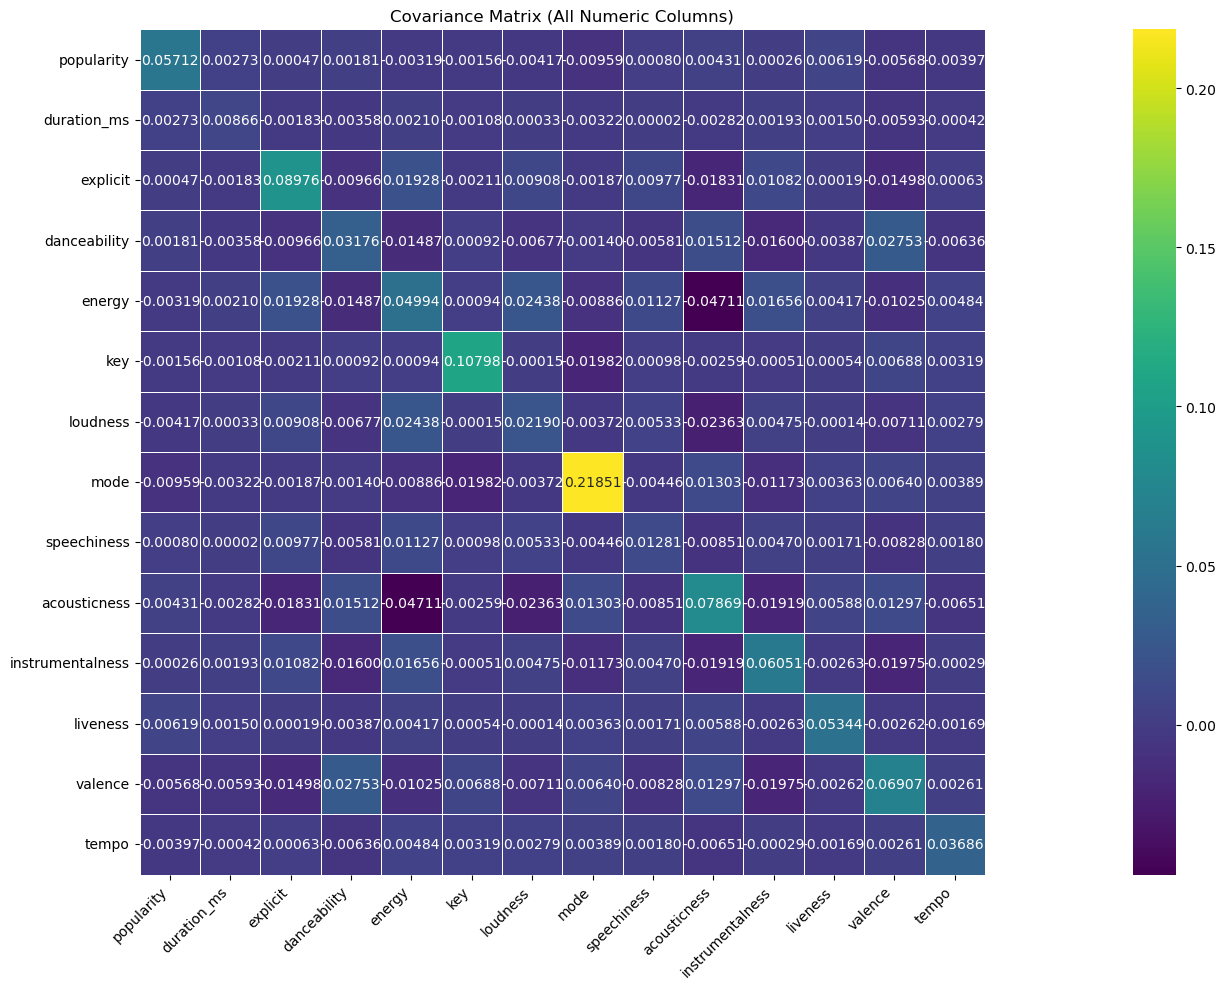

In [3]:


def plot_full_covariance_matrix(df2):

    dataX = df2.values.T 
    
    cov_matrix = np.cov(dataX)
    cov_df = pd.DataFrame(cov_matrix, index=data.columns, columns=data.columns)

    # Plot heatmap
    plt.figure(figsize=(30, 10))
    sns.heatmap(cov_df,
                annot=True,
                fmt=".5f",
                cmap="viridis",
                square=True,
                linewidths=0.5, 
                xticklabels=data.columns,
                yticklabels=data.columns)

    plt.title("Covariance Matrix (All Numeric Columns)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()



cov_matrix= plot_full_covariance_matrix(normalized_df)

## Plotting MPB Covariance Matrix
This cell calls the `plot_full_covariance_matrix` function to visualize the covariance matrix
specifically for the 'mpb' genre data. This helps in understanding the relationships between features within the MPB music genre.

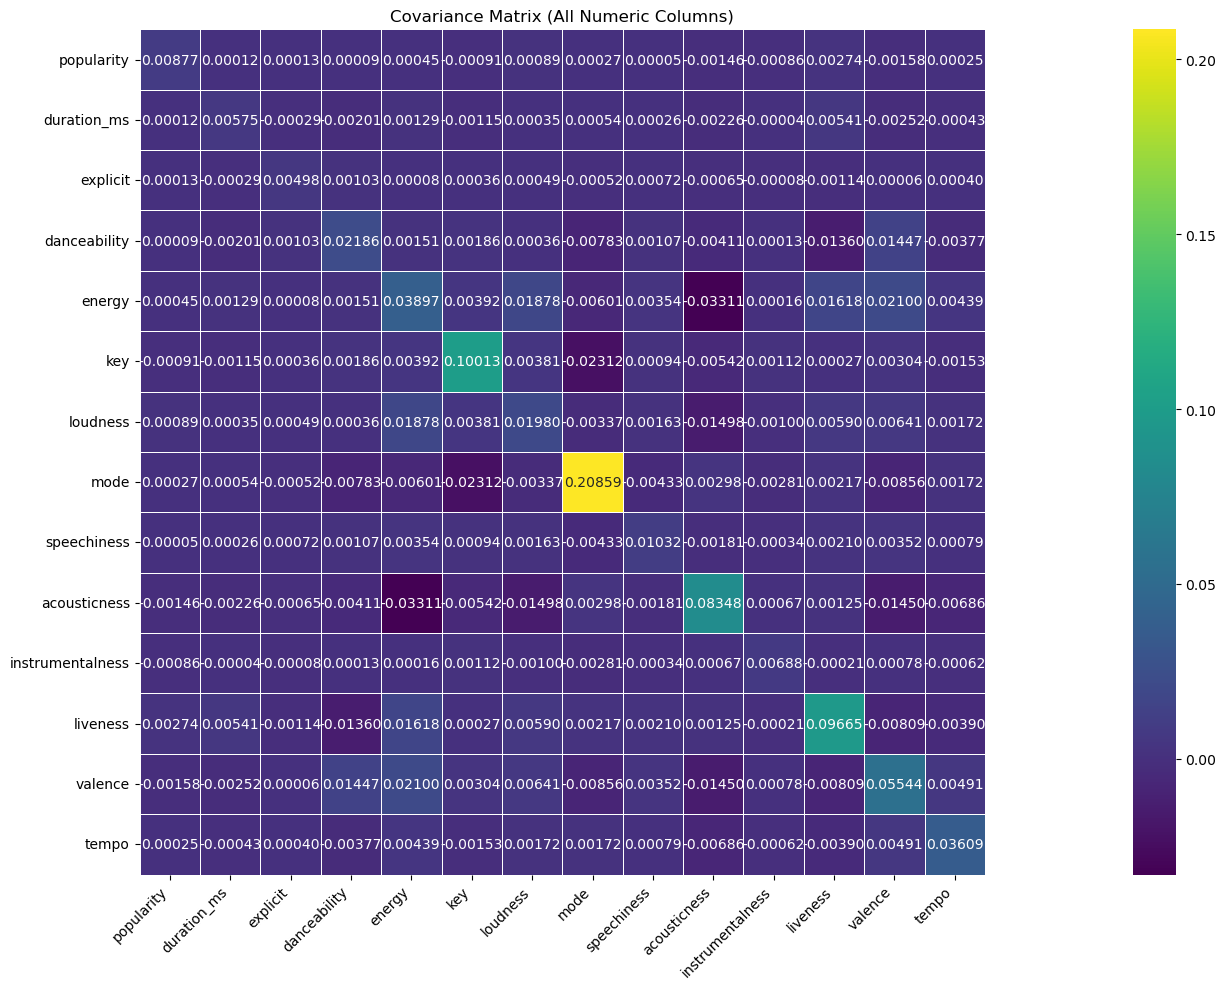

In [4]:
cov_matrix= plot_full_covariance_matrix(mpb_rows)

## Plotting ROCK Covariance Matrix
This cell calls the `plot_full_covariance_matrix` function to visualize the covariance matrix
specifically for the 'rock' genre data. This helps in understanding the relationships between features within the rock music genre.

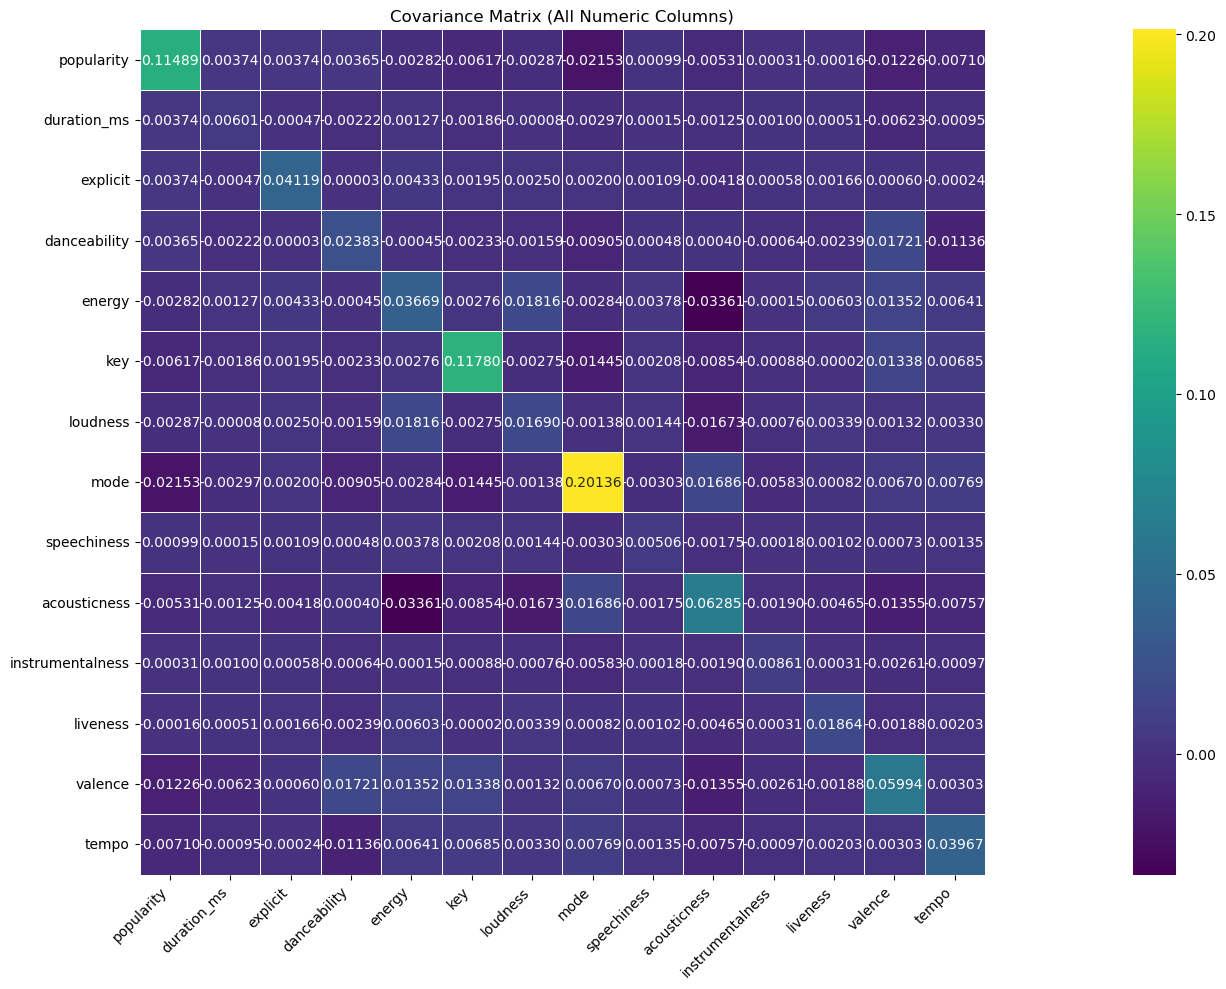

In [5]:
cov_matrix= plot_full_covariance_matrix(rock_rows)

## Plotting Death Metal Covariance Matrix
This cell calls the `plot_full_covariance_matrix` function to visualize the covariance matrix
specifically for the 'death-metal' genre data. This helps in understanding the relationships between features within the death metal music genre.

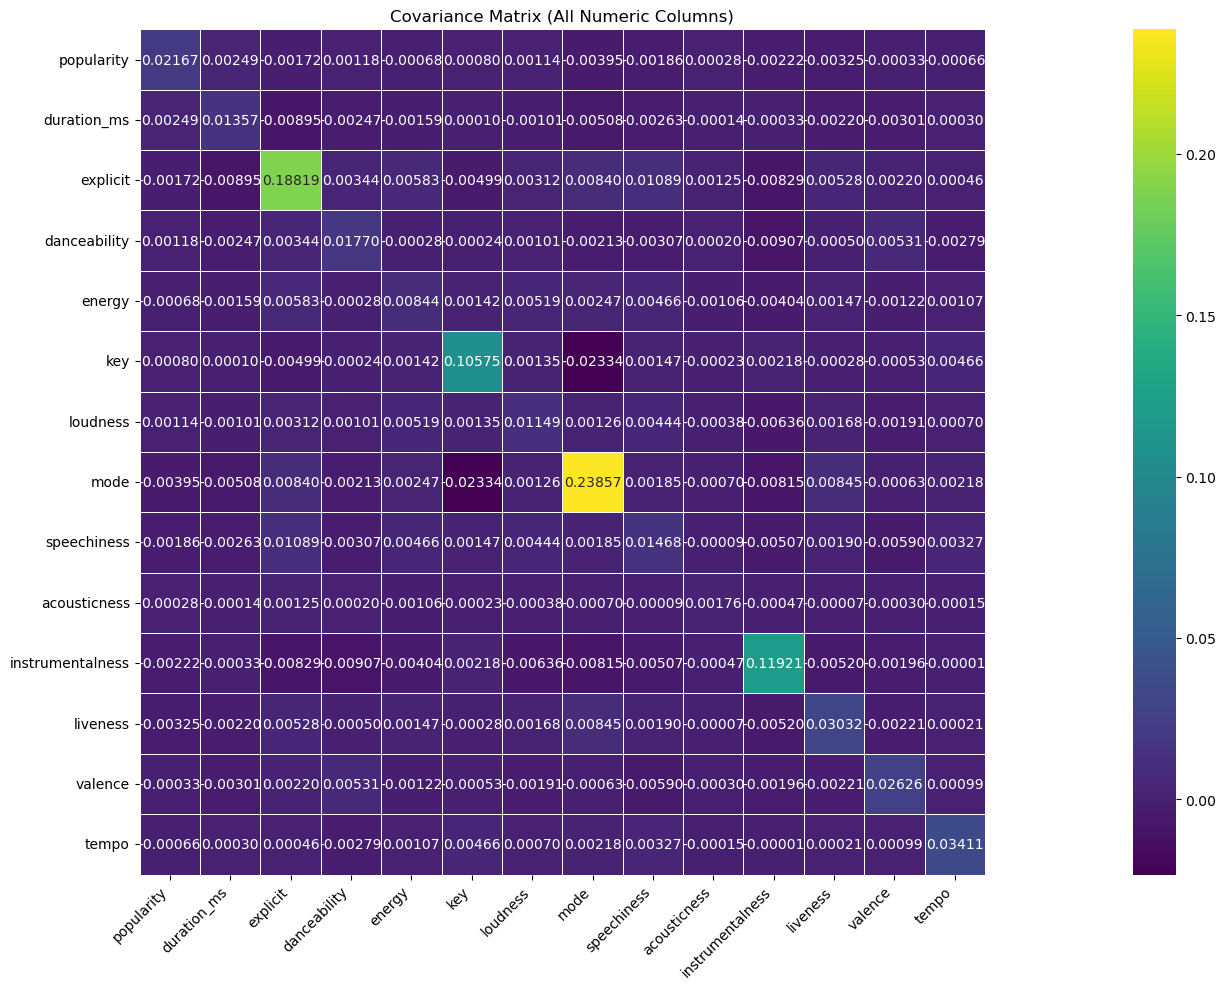

In [6]:
cov_matrix= plot_full_covariance_matrix(death_metal_rows)

# Plotting Full Correlation Matrix
**This cell defines and executes a function to plot a correlation matrix for a given DataFrame**
- The `plot_correlation_matrix` function takes a DataFrame `df` as input.
- It first selects only the numeric columns from the DataFrame.
- Then, it calculates the Pearson correlation matrix for these numeric columns.
- A heatmap of the correlation matrix is generated using seaborn, displaying the correlation coefficients between pairs of features. The `annot=True` argument ensures that the correlation values are displayed on the heatmap.
- After defining the function, it is called with `normalized_df`

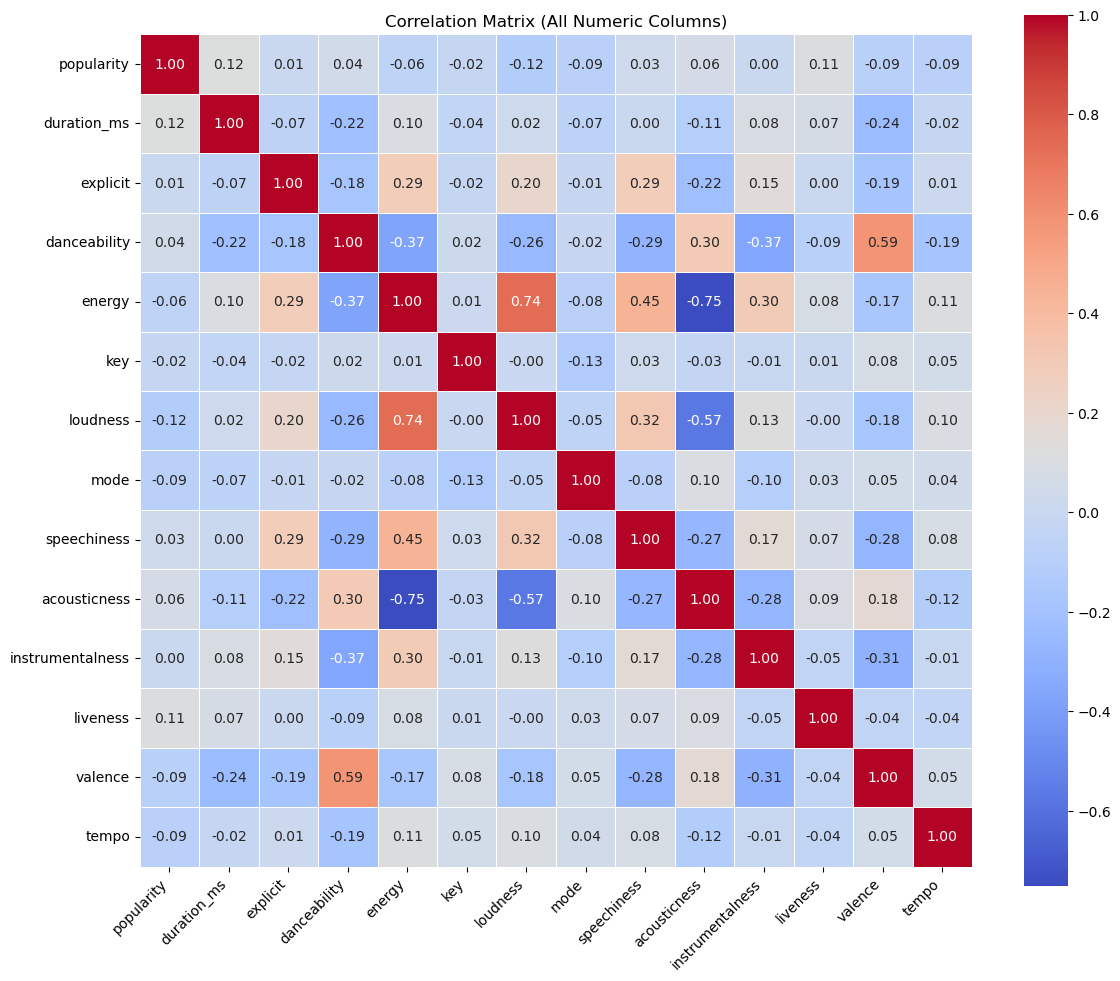

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,0.122840,0.006570,0.042456,-0.059634,-0.019895,-0.117852,-0.085855,0.029554,0.064215,0.004388,0.112071,-0.090360,-0.086616
duration_ms,0.122840,1.000000,-0.065530,-0.216051,0.100924,-0.035286,0.023780,-0.074029,0.001552,-0.108211,0.084434,0.069850,-0.242549,-0.023431
explicit,0.006570,-0.065530,1.000000,-0.180851,0.288004,-0.021448,0.204839,-0.013386,0.288313,-0.217918,0.146842,0.002686,-0.190207,0.010939
danceability,0.042456,-0.216051,-0.180851,1.000000,-0.373333,0.015721,-0.256613,-0.016761,-0.287882,0.302506,-0.365095,-0.094030,0.587719,-0.185937
energy,-0.059634,0.100924,0.288004,-0.373333,1.000000,0.012740,0.737309,-0.084806,0.445643,-0.751426,0.301251,0.080802,-0.174571,0.112734
key,-0.019895,-0.035286,-0.021448,0.015721,0.012740,1.000000,-0.003018,-0.129061,0.026483,-0.028054,-0.006284,0.007105,0.079648,0.050606
loudness,-0.117852,0.023780,0.204839,-0.256613,0.737309,-0.003018,1.000000,-0.053712,0.318502,-0.569213,0.130448,-0.004034,-0.182684,0.098119
mode,-0.085855,-0.074029,-0.013386,-0.016761,-0.084806,-0.129061,-0.053712,1.000000,-0.084352,0.099338,-0.102052,0.033578,0.052079,0.043364
speechiness,0.029554,0.001552,0.288313,-0.287882,0.445643,0.026483,0.318502,-0.084352,1.000000,-0.268050,0.168952,0.065441,-0.278481,0.082899
acousticness,0.064215,-0.108211,-0.217918,0.302506,-0.751426,-0.028054,-0.569213,0.099338,-0.268050,1.000000,-0.278082,0.090651,0.175982,-0.120793


In [7]:

def plot_correlation_matrix(df):

    numeric_df = df.select_dtypes(include='number')

    corr_matrix = numeric_df.corr()

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix,
                annot=True,
                fmt=".2f",
                cmap="coolwarm",
                square=True,
                linewidths=0.5,
                xticklabels=corr_matrix.columns,
                yticklabels=corr_matrix.columns)

    plt.title("Correlation Matrix (All Numeric Columns)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    return corr_matrix

plot_correlation_matrix(normalized_df)